# Random Under Sampling

Random under sampling is a technique used to address class imbalance in datasets, particularly in the context of machine learning. When you have a dataset where one class significantly outnumbers the other (e.g., in binary classification), it can lead to biased models that perform poorly on the minority class.

## How Random Under Sampling Works:
1. **Identify the Majority and Minority Classes**: Determine which class has more instances (majority) and which has fewer (minority).
2. **Randomly Remove Instances from the Majority Class**: Randomly select and remove instances from the majority class until the number of instances in both classes is balanced.
3. **Create a New Balanced Dataset**: Combine the remaining instances of the majority class with all instances of the minority class to form a new, balanced dataset.

## Example in Python using `imbalanced-learn` library:
```python
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np

# Example dataset
X = np.array([[i] for i in range(1, 11)])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

print(f"Original dataset shape: {Counter(y)}")

# Apply random under sampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print(f"Resampled dataset shape: {Counter(y_res)}")


Random over-sampling is a technique used to address class imbalance in datasets, particularly in the context of machine learning. When you have a dataset where some classes are underrepresented compared to others, it can lead to biased models that perform poorly on the minority class. Random over-sampling helps mitigate this issue by increasing the number of instances in the minority class.

### How Random Over-Sampling Works:
1. **Identify the Minority Class**: Determine which class has fewer instances.
2. **Randomly Duplicate Instances**: Randomly select instances from the minority class and duplicate them until the minority class has as many instances as the majority class.
3. **Combine the Data**: Combine the original dataset with the duplicated instances to create a balanced dataset.

### Example in Python using `imblearn` library:
Here's an example of how to perform random over-sampling using the `RandomOverSampler` from the `imblearn` library:

```python


from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pandas as pd

# Example dataset
data = {'feature1': [1, 2, 3, 4, 5, 6],
        'feature2': [10, 20, 30, 40, 50, 60],
        'class': [0, 0, 0, 1, 1, 1]}

df = pd.DataFrame(data)

# Separate features and target
X = df[['feature1', 'feature2']]
y = df['class']

# Check the class distribution
print(f"Original class distribution: {Counter(y)}")

# Apply Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print(f"Resampled class distribution: {Counter(y_resampled)}")
```

### Key Points:
- **Random State**: Setting a `random_state` ensures reproducibility.
- **Counter**: The `Counter` class from the `collections` module is used to count the occurrences of each class before and after resampling.
- **Balancing**: The goal is to balance the dataset so that the model does not favor the majority class.

Random over-sampling is a simple yet effective technique to handle imbalanced datasets, but it can lead to overfitting since it duplicates existing instances. Other techniques like SMOTE (Synthetic Minority Over-sampling Technique) can also be considered for generating synthetic samples.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [44]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0



### Understanding `iloc` in Pandas

`iloc` is a property in pandas used for integer-location based indexing for selection by position. It allows you to select rows and columns by their integer positions.

#### Key Points:
- **Selection by Position**: `iloc` allows you to select rows and columns by their integer positions, which are zero-based.
- **Syntax**: The basic syntax is `dataframe.iloc[row_indexer, column_indexer]`.
- **Row and Column Indexers**: You can use integers, lists of integers, slices, or boolean arrays as indexers.

#### Examples:
1. **Selecting a Single Row**:
    ```python
    row = dataframe.iloc[0]  # Selects the first row
    ```

2. **Selecting Multiple Rows**:
    ```python
    rows = dataframe.iloc[0:3]  # Selects the first three rows
    ```

3. **Selecting Specific Rows and Columns**:
    ```python
    subset = dataframe.iloc[0:3, 1:3]  # Selects the first three rows and the second and third columns
    ```

4. **Using Lists of Integers**:
    ```python
    specific_rows = dataframe.iloc[[0, 2, 4]]  # Selects the 1st, 3rd, and 5th rows
    ```

5. **Using Boolean Arrays**:
    ```python
    boolean_indexer = [True, False, True, False]
    selected_rows = dataframe.iloc[boolean_indexer]  # Selects rows where the indexer is True
    ```

#### Example in Context:
In the provided notebook, the following line uses `iloc` to select all rows starting from the third row and all columns except the first one:
```python
dataset = dataset.iloc[2:, 1:]
```
This effectively removes the first two rows and the first column from the dataset.


In [45]:
dataset= dataset.iloc[:,2:]    
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [46]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [48]:
x = dataset.iloc[:,:-1]
y = dataset["Purchased"]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [51]:
lr.score(x_test, y_test)*100

88.75

In [52]:
lr.predict([[45,26000]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

<Axes: >

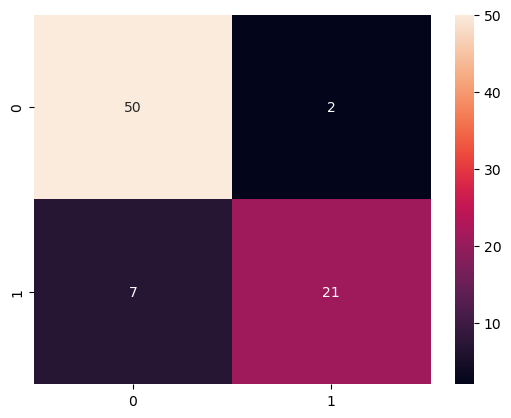

In [54]:
sns.heatmap(confusion_matrix(y_test, lr.predict(x_test)), annot=True)

In [55]:
precision_score(y_test, lr.predict(x_test))*100

91.30434782608695

In [56]:
recall_score(y_test, lr.predict(x_test))*100

75.0

In [57]:
f1_score(y_test, lr.predict(x_test))*100

82.35294117647058

## After Under Sampling

In [58]:
from imblearn.under_sampling import RandomUnderSampler

In [59]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [60]:
dataset= dataset.iloc[:,2:]    
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [61]:
x = dataset.iloc[:,:-1] 
y = dataset["Purchased"]

In [62]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [63]:
ru = RandomUnderSampler(random_state=42)
ru_x,ru_y = ru.fit_resample(x, y)

In [64]:
ru_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [65]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(ru_x, ru_y, test_size=0.2, random_state=42)

In [66]:
ru_lr = LogisticRegression()
ru_lr.fit(x_train1, y_train1)

LogisticRegression()

In [67]:
ru_lr.score(x_test1, y_test1)*100

77.58620689655173

<Axes: >

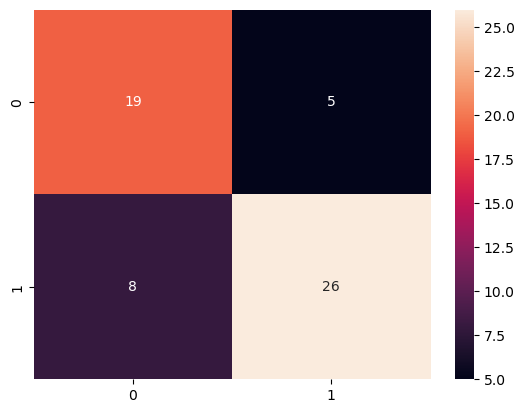

In [68]:
sns.heatmap(confusion_matrix(y_test1, ru_lr.predict(x_test1)), annot=True)

## After Over Sampling

In [69]:
from imblearn.over_sampling import RandomOverSampler

In [70]:
ro = RandomOverSampler(random_state=42)
ro_x,ro_y = ro.fit_resample(x, y)


In [71]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(ro_x, ro_y, test_size=0.2, random_state=42)

In [72]:
ro_lr = LogisticRegression()
ro_lr.fit(x_train2, y_train2)

LogisticRegression()

In [73]:
ro_lr.score(x_test2, y_test2)*100

86.40776699029125

<Axes: >

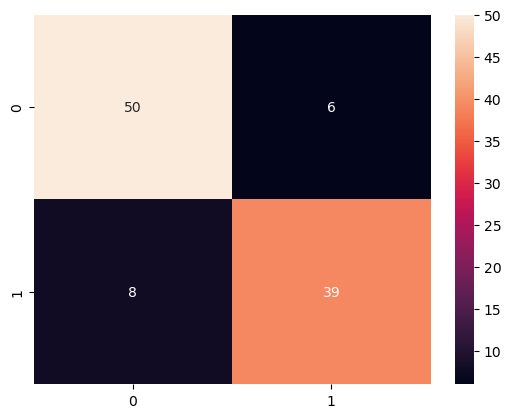

In [74]:
sns.heatmap(confusion_matrix(y_test2, ro_lr.predict(x_test2)), annot=True)

In [75]:
ru_lr.predict([[45,26000]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [76]:
ro_lr.predict([[45,26000]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)